### Data Processing and Result Discovery

Now, this part is really where we start to code and do data analysis. In order to keep track our process, we divide it into the following 5 parts:

- Part 1: Preparation
- Part 2: Data Preprocessing
- Part 3: Exploratory Data Analysis
- Part 4: Predictive Data Anlysis
- Part 5: Results and Conclusions

We will demonstrate each part detailedly in the below sections.

<font color = red>__Part 1: Preparation__

Our codes will cover the following in this part:
- Inputting all needed packages and functions
- Setting the seed
- Loading data that we will be using

In [48]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(cowplot)

In [49]:
set.seed(2535) 

In [50]:
url <- "https://drive.google.com/uc?export=download&id=11KyK-H_2aP1I4FYR1aAC0wE4JB9BbAqz"
download.file(url, "raisin.xlsx")
raisin <- read_excel("raisin.xlsx")
head(raisin)

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
49242,318.1254,200.1221,0.7773513,51368,0.6584564,881.836,Kecimen


<font color = red>__Part 2: Data Preprocessing__

Our codes will cover the following in this part:
- Cleaning and wrangling the data
- Creating the train / test split 
- Demonstrating why we will use MajorAxisLength as our fixed variable and why we will discard one of our combinations (MajorAxisLength & Extent) even before our Part 4: Predictive Data Analysis

In [51]:
# This is where we clean and wrangle our data
# There is really not too much to do since this dataset is already very tidy
raisin <- raisin |>
    mutate(Class = as_factor(Class)) |>
    filter(!is.na(Area),
           !is.na(MajorAxisLength),
           !is.na(MinorAxisLength),
           !is.na(Eccentricity),
           !is.na(ConvexArea),
           !is.na(Extent),
           !is.na(Perimeter))
head(raisin)

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
49242,318.1254,200.1221,0.7773513,51368,0.6584564,881.836,Kecimen


In [52]:
# Here we are going to separate our data into training set and test test
raisin_split <- initial_split(raisin, prop = 0.7, strata = Class)
raisin_train <- training(raisin_split)
raisin_test <- testing(raisin_split)

In [53]:
decide_recipe <- recipe(Class ~ ., data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()

decide_data <- bake(decide_recipe, raisin_train)
head(decide_data)

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.3058565,1.9159088,0.3924262,1.417334846,1.2825230,0.5977362,1.5657658,Besni
0.7909821,0.9079717,0.6949209,0.669403207,0.8150746,0.5682589,0.9884439,Besni
0.2498630,0.1572109,0.4925829,0.005492329,0.2394630,0.1275983,0.2044756,Besni
-0.6560285,-0.2156557,-0.8709853,0.827959068,-0.5654958,-1.9227672,-0.2822601,Besni
1.7349142,1.3643469,1.6646284,0.402433114,1.6680215,0.4092748,1.3468693,Besni
1.2213790,1.4930019,0.6914924,1.079157235,1.1717606,0.8004837,1.2272835,Besni


##### Figure 1 (below): Boxplots for different variables vs types of raisin 

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


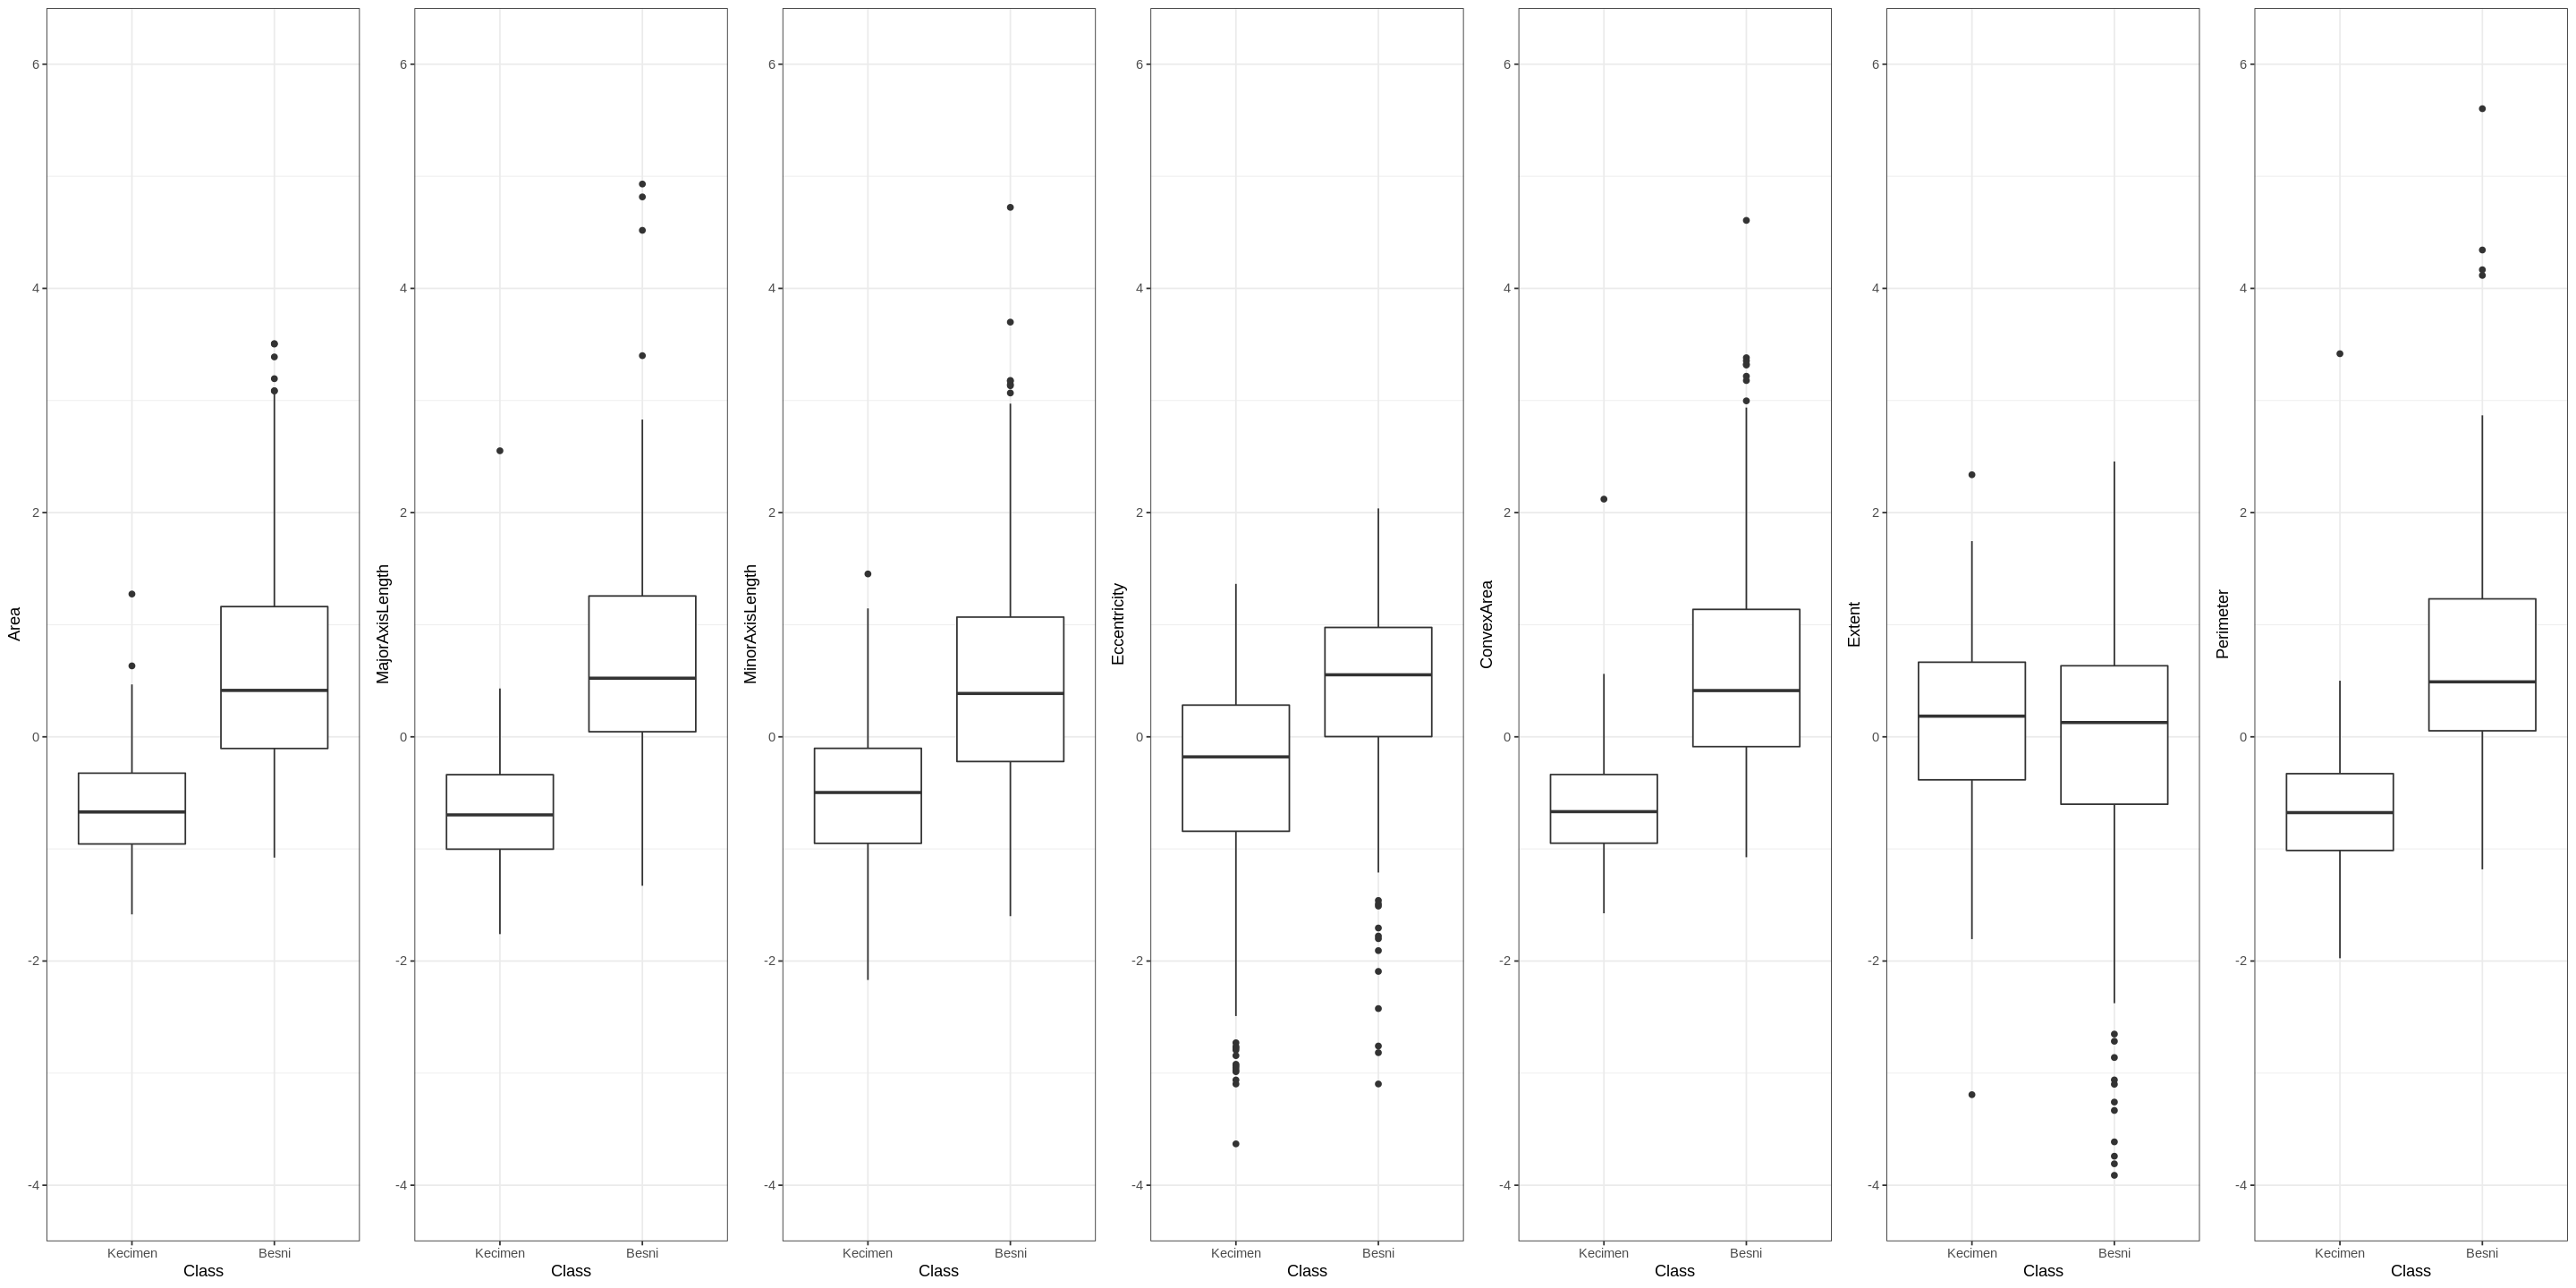

In [54]:
options(repr.plot.width = 24, repr.plot.height = 12)
graph_Ar <- ggplot(data = decide_data, mapping = aes(x = Class, y = Area)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Mal <- ggplot(data = decide_data, mapping = aes(x = Class, y = MajorAxisLength)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Mil <- ggplot(data = decide_data, mapping = aes(x = Class, y = MinorAxisLength)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Ecc <- ggplot(data = decide_data, mapping = aes(x = Class, y = Eccentricity)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Convex <- ggplot(data = decide_data, mapping = aes(x = Class, y = ConvexArea)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Ex <- ggplot(data = decide_data, mapping = aes(x = Class, y = Extent)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
graph_Per <- ggplot(data = decide_data, mapping = aes(x = Class, y = Perimeter)) + geom_boxplot() + theme_bw() + ylim(c(-4, 6))
compare_graph <- plot_grid(graph_Ar,
                           graph_Mal,
                           graph_Mil,
                           graph_Ecc,
                           graph_Convex,
                           graph_Ex,
                           graph_Per,
                           ncol = 7)
compare_graph

This cell needs to be written in formal English Chehak! this is only a draft note

We can discard Extent based on graph 1, think from this viewpoints:
intervals: More different intervals (cover more different place), easy to distinguish between two types of raisins
need formal explanation why we discard Extent !!

##### Figure 2 (below): Boxplots for MajorAxisLength vs Class and Perimeter & Class

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”


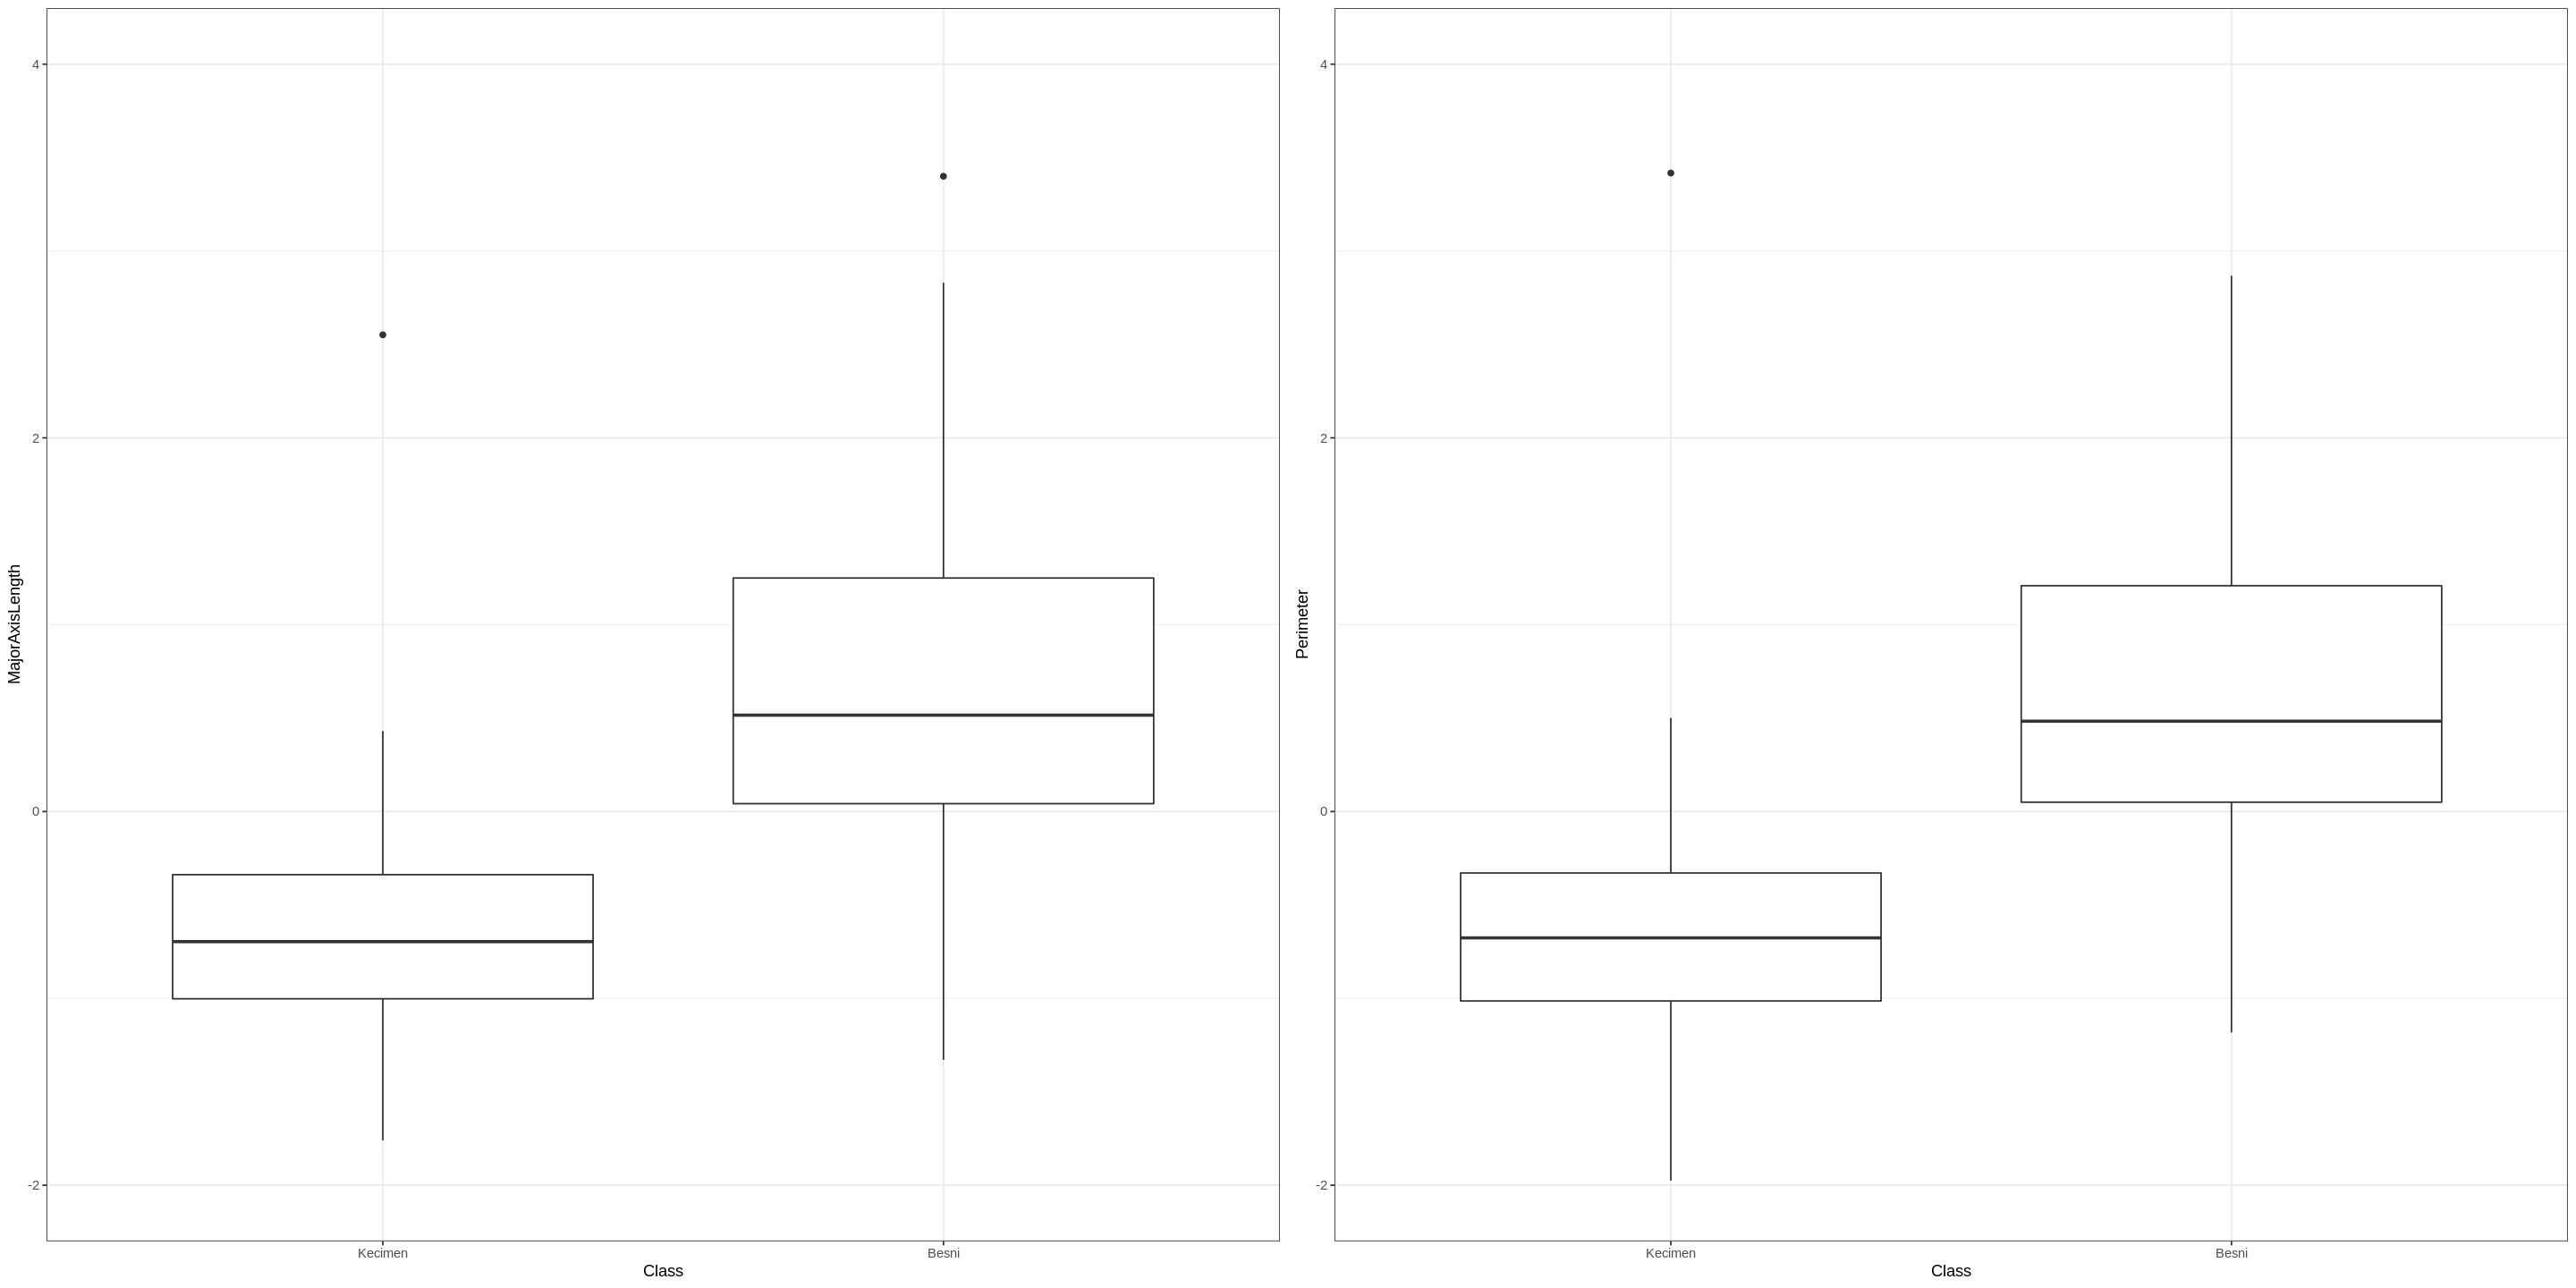

In [55]:
# Since the boxplots for MajorAxisLength & Class and Perimeter & Class are very similar in Figure 1,
# we put these two separately in below to determine which variable to be used as our fixed variable

graph_Mal_bigger <- ggplot(data = decide_data, mapping = aes(x = Class, y = MajorAxisLength)) + geom_boxplot() + theme_bw() + ylim(c(-2, 4))
graph_Per_bigger <- ggplot(data = decide_data, mapping = aes(x = Class, y = Perimeter)) + geom_boxplot() + theme_bw() + ylim(c(-2, 4))
compare_Mal_Per <- plot_grid(graph_Mal_bigger, graph_Per_bigger, ncol = 2)
compare_Mal_Per

This cell needs to be written in formal English Chehak! this is only a draft note

Since the boxplots for MajorAxisLength & Class and Perimeter & Class are very similar in Figure 1, we put those two separately in figure 2 above to compare again to decide which one to be used as our fixed variable

By comparing these two bigger boxplots in figure 2, we can see that the MajorAxislength one has a wider interval difference than the other.
So let's use MajorAxisLength as our fixed variable

<font color = red>__Part 3: Exploratory Data Analysis__

Our codes will cover the following in this part:
- Data summary for exploratory analysis
- Data visualization for exploratory analysis
    
Note: 
1. We will be using training data set for this part, and we will also exclude *Extent* variable here (reason is explained above)
2. Figure 3 is a little bit different: We will be using scaled training data set **decide_data** that we obtained before to make the graph. And beyond that, we will still exclude *Extent* variable while making it

##### Table 1 (below): Number of rows in the training dataset

In [56]:
table_1 <- raisin_train |>
    summarize(rows = n())
table_1

rows
<int>
630


##### Table 2 (below): Number of observations in each class

In [57]:
table_2 <- raisin_train |>
    group_by(Class) |>
    summarize(n = n())
table_2                                             

Class,n
<fct>,<int>
Kecimen,315
Besni,315


##### Table 3 (below): Mean for each variable for both raisin classes

In [58]:
table_3 <- raisin_train |>
    select(- Extent, - Class) |>
    map_df(mean)
table_3                                             

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Perimeter
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
86880.58,428.5736,253.4141,0.7816852,90347.47,1160.895


##### Table 4 (below): Mean for each variable for each class

In [1]:
table_4 <- raisin_train |>
    group_by(Class) |>
    summarize(ave_area = mean(Area),
              ave_major_al = mean(MajorAxisLength),
              ave_minor_al = mean(MinorAxisLength),
              ave_ecc = mean(Eccentricity),
              ave_convex = mean(ConvexArea),
              ave_per = mean(Perimeter))
table_4                                             

ERROR: Error in summarize(group_by(raisin_train, Class), ave_area = mean(Area), : could not find function "summarize"


##### Figure 3 (below): how the relationship between predictor "MajorAxisLength" and other predictors determine the type of the raisin

In [2]:
options(repr.plot.width = 12, repr.plot.height = 25)
raisin_plot_1 <- decide_data |>
    ggplot(aes(x = MajorAxisLength, y = Area, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Area", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

raisin_plot_2 <- decide_data |>
    ggplot(aes(x = MajorAxisLength, y = MinorAxisLength, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Minor Axis Length", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

raisin_plot_3 <- decide_data |>
    ggplot(aes(x = MajorAxisLength, y = Eccentricity, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Eccentricity", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

raisin_plot_4 <- decide_data |>
    ggplot(aes(x = MajorAxisLength, y = ConvexArea, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Convex Area", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

raisin_plot_5 <- decide_data |>
    ggplot(aes(x = MajorAxisLength, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Perimeter", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

raisin_relation <- plot_grid(raisin_plot_1, raisin_plot_2, 
                             raisin_plot_3, raisin_plot_4, 
                             raisin_plot_5, nrow = 5)
raisin_relation

ERROR: Error in ggplot(decide_data, aes(x = MajorAxisLength, y = Area, color = Class)): could not find function "ggplot"


Chehak, remember to explain in general what we see here!

<font color = red>**Part 4: Predictive Data Analysis**

__*** As we are predicting the class of raisin in the dataset, we will be using k-nn Classification method here ***__

Our codes will cover the following in this part:
- Finding prediction accuracy we got from all 5 different combinations
- How different models we got from each combination look like when they are applied on the testing data (visualization)
    
Note: Recall that *MajorAxisLength* is our fixed variable, and *Extent* will not be included in our predictive data analysis

In [61]:
# The following objects are those that can be used through all 5 combinations:
raisin_vfold <- vfold_cv(raisin_train, v = 5, strata = Class)                  # cross-validation
gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))                # setting range for k that we will be using to tune our model

<font color = blue>*Combination 1: MajorAxisLength & Area*

Here, we are training the model on one of the predictors which is Area. We do this by creating a recipe to standardise the predictor. Next, we run a gridsearch on various k values, ranging from 1-100. 

In [62]:
area_recipe <- recipe(Class ~ Area, data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

area_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

area_accuracies <- workflow() |>
    add_recipe(area_recipe) |>
    add_model(area_spec) |>
    tune_grid(resamples = raisin_vfold,
              grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
head(area_accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7492063,5,0.015592764,Preprocessor1_Model01
6,accuracy,binary,0.7793651,5,0.009848947,Preprocessor1_Model02
11,accuracy,binary,0.8079365,5,0.014504498,Preprocessor1_Model03
16,accuracy,binary,0.8063492,5,0.013654485,Preprocessor1_Model04
21,accuracy,binary,0.8111111,5,0.012895299,Preprocessor1_Model05
26,accuracy,binary,0.8111111,5,0.011054276,Preprocessor1_Model06


Here, we are finding the neighbour configuration with highest accuarcy, out of all the trained models.

In [63]:
k_suitable <- area_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)
k_suitable

[1] 31

Now that we have the best k value, we train the knn classifier with that k value on the entire training set, and predict the outcomes on the test set. We then calculate the accuarcy of those predictions.

In [64]:
area_spec2 <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = k_suitable) |>
    set_engine("kknn") |>
    set_mode("classification")

area_fit <- workflow() |>
    add_recipe(area_recipe) |>
    add_model(area_spec2) |>
    fit(data = raisin_train)

area_test_final <- predict(area_fit, raisin_test) |>
    bind_cols(raisin_test)
head(area_test_final)

area_test_predictions <- area_test_final |>
    metrics(truth = Class, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
area_test_predictions

.pred_class,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Kecimen,75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
Kecimen,42256,323.1896,172.5759,0.8454988,44743,0.6980309,849.728,Kecimen
Kecimen,43295,304.2845,182.8110,0.7994070,44714,0.7138382,814.680,Kecimen
Kecimen,61251,301.5078,273.6599,0.4197537,64732,0.6435957,971.769,Kecimen
Kecimen,49882,287.2643,222.1859,0.6338519,50880,0.7663778,843.764,Kecimen
Besni,95245,397.0941,307.2739,0.6334223,97988,0.7530440,1201.390,Kecimen


[1] 0.8111111

<font color = blue>*Combination 2: MajorAxisLength & MinorAxisLength*

Similar to combination 1, we run the same steps but with the predictor MinorAxisLength.

In [65]:
minor_recipe <- recipe(Class ~ MinorAxisLength, data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

minor_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

minor_accuracies <- workflow() |>
    add_recipe(minor_recipe) |>
    add_model(minor_spec) |>
    tune_grid(resamples = raisin_vfold,
              grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

In [66]:
k_suitable <- minor_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)

In [67]:
minor_spec2 <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = k_suitable) |>
    set_engine("kknn") |>
    set_mode("classification")

minor_fit <- workflow() |>
    add_recipe(minor_recipe) |>
    add_model(minor_spec2) |>
    fit(data = raisin_train)

minor_test_final <- predict(minor_fit, raisin_test) |>
    bind_cols(raisin_test)
head(minor_test_final)

minor_test_predictions <- minor_test_final |>
    metrics(truth = Class, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
minor_test_predictions

.pred_class,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Kecimen,75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
Kecimen,42256,323.1896,172.5759,0.8454988,44743,0.6980309,849.728,Kecimen
Kecimen,43295,304.2845,182.8110,0.7994070,44714,0.7138382,814.680,Kecimen
Besni,61251,301.5078,273.6599,0.4197537,64732,0.6435957,971.769,Kecimen
Kecimen,49882,287.2643,222.1859,0.6338519,50880,0.7663778,843.764,Kecimen
Besni,95245,397.0941,307.2739,0.6334223,97988,0.7530440,1201.390,Kecimen


[1] 0.6962963

<font color = blue>*Combination 3: MajorAxisLength & Eccentricity*

Similar to combination 1, we run the same steps but with the predictor Eccentricity.

In [68]:
ecc_recipe <- recipe(Class ~ Eccentricity, data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

ecc_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

ecc_accuracies <- workflow() |>
    add_recipe(ecc_recipe) |>
    add_model(ecc_spec) |>
    tune_grid(resamples = raisin_vfold,
              grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

In [69]:
k_suitable <- ecc_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)

In [70]:
ecc_spec2 <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = k_suitable) |>
    set_engine("kknn") |>
    set_mode("classification")

ecc_fit <- workflow() |>
    add_recipe(ecc_recipe) |>
    add_model(ecc_spec2) |>
    fit(data = raisin_train)

ecc_test_final <- predict(ecc_fit, raisin_test) |>
    bind_cols(raisin_test)
head(ecc_test_final)

ecc_test_predictions <- ecc_test_final |>
    metrics(truth = Class, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
ecc_test_predictions

.pred_class,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Besni,75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
Besni,42256,323.1896,172.5759,0.8454988,44743,0.6980309,849.728,Kecimen
Kecimen,43295,304.2845,182.8110,0.7994070,44714,0.7138382,814.680,Kecimen
Kecimen,61251,301.5078,273.6599,0.4197537,64732,0.6435957,971.769,Kecimen
Kecimen,49882,287.2643,222.1859,0.6338519,50880,0.7663778,843.764,Kecimen
Kecimen,95245,397.0941,307.2739,0.6334223,97988,0.7530440,1201.390,Kecimen


[1] 0.762963

<font color = blue>*Combination 4: MajorAxisLength & ConvexArea*

Similar to combination 1, we run the same steps but with the predictor ConvexArea.

In [71]:
convex_recipe <- recipe(Class ~ ConvexArea, data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

convex_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

convex_accuracies <- workflow() |>
    add_recipe(convex_recipe) |>
    add_model(convex_spec) |>
    tune_grid(resamples = raisin_vfold,
              grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

In [72]:
k_suitable <- convex_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)

In [73]:
convex_spec2 <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = k_suitable) |>
    set_engine("kknn") |>
    set_mode("classification")

convex_fit <- workflow() |>
    add_recipe(convex_recipe) |>
    add_model(convex_spec2) |>
    fit(data = raisin_train)

convex_test_final <- predict(convex_fit, raisin_test) |>
    bind_cols(raisin_test)
head(convex_test_final)

convex_test_predictions <- convex_test_final |>
    metrics(truth = Class, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
convex_test_predictions

.pred_class,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Kecimen,75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
Kecimen,42256,323.1896,172.5759,0.8454988,44743,0.6980309,849.728,Kecimen
Kecimen,43295,304.2845,182.8110,0.7994070,44714,0.7138382,814.680,Kecimen
Kecimen,61251,301.5078,273.6599,0.4197537,64732,0.6435957,971.769,Kecimen
Kecimen,49882,287.2643,222.1859,0.6338519,50880,0.7663778,843.764,Kecimen
Besni,95245,397.0941,307.2739,0.6334223,97988,0.7530440,1201.390,Kecimen


[1] 0.8148148

<font color = blue>*Combination 5: MajorAxisLength & Perimeter*

Similar to combination 1, we run the same steps but with the predictor Perimeter.

In [74]:
per_recipe <- recipe(Class ~ Perimeter, data = raisin_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

per_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

per_accuracies <- workflow() |>
    add_recipe(per_recipe) |>
    add_model(per_spec) |>
    tune_grid(resamples = raisin_vfold,
              grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

In [75]:
k_suitable <- per_accuracies |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(neighbors)

In [76]:
per_spec2 <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = k_suitable) |>
    set_engine("kknn") |>
    set_mode("classification")

per_fit <- workflow() |>
    add_recipe(per_recipe) |>
    add_model(per_spec2) |>
    fit(data = raisin_train)

per_test_final <- predict(per_fit, raisin_test) |>
    bind_cols(raisin_test)
head(per_test_final)

per_test_predictions <- per_test_final |>
    metrics(truth = Class, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    pull(.estimate)
per_test_predictions

.pred_class,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Kecimen,75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
Kecimen,42256,323.1896,172.5759,0.8454988,44743,0.6980309,849.728,Kecimen
Kecimen,43295,304.2845,182.8110,0.7994070,44714,0.7138382,814.680,Kecimen
Kecimen,61251,301.5078,273.6599,0.4197537,64732,0.6435957,971.769,Kecimen
Kecimen,49882,287.2643,222.1859,0.6338519,50880,0.7663778,843.764,Kecimen
Besni,95245,397.0941,307.2739,0.6334223,97988,0.7530440,1201.390,Kecimen


[1] 0.8518519

<font color = red>__Part 5: Results and Conclusions__

Our codes will cover the following in this part:
- Making a tibble combing all of measuring accuracies obtained from the above 5 combinations
- Comparing which combination will give us the best prediction on raisin type

Now, we list all the accuracies of the models trained wrt their predictor combination. 

In [77]:
all_accuracies <- tibble(var_name = c("Area", "MinorAxisLength", "Eccentricity", "ConvexArea", "Perimeter"),
    accuracy = c(area_test_predictions, minor_test_predictions, 
                 ecc_test_predictions, convex_test_predictions, per_test_predictions))       
all_accuracies

var_name,accuracy
<chr>,<dbl>
Area,0.8111111
MinorAxisLength,0.6962963
Eccentricity,0.7629630
ConvexArea,0.8148148
Perimeter,0.8518519


Putting the accuracies in descending order to find the best one.

##### Table 5 (below): Prediction accuracies for all 5 combinations

In [98]:
best_comb <- all_accuracies |>
    arrange(desc(accuracy))
best_comb

var_name,accuracy
<chr>,<dbl>
Perimeter,0.8518519
ConvexArea,0.8148148
Area,0.8111111
Eccentricity,0.7629630
MinorAxisLength,0.6962963


##### Figure 4 (below): Wrong predictions made by MajorAxisLength & Perimeter model and Correct class labels for all testing data

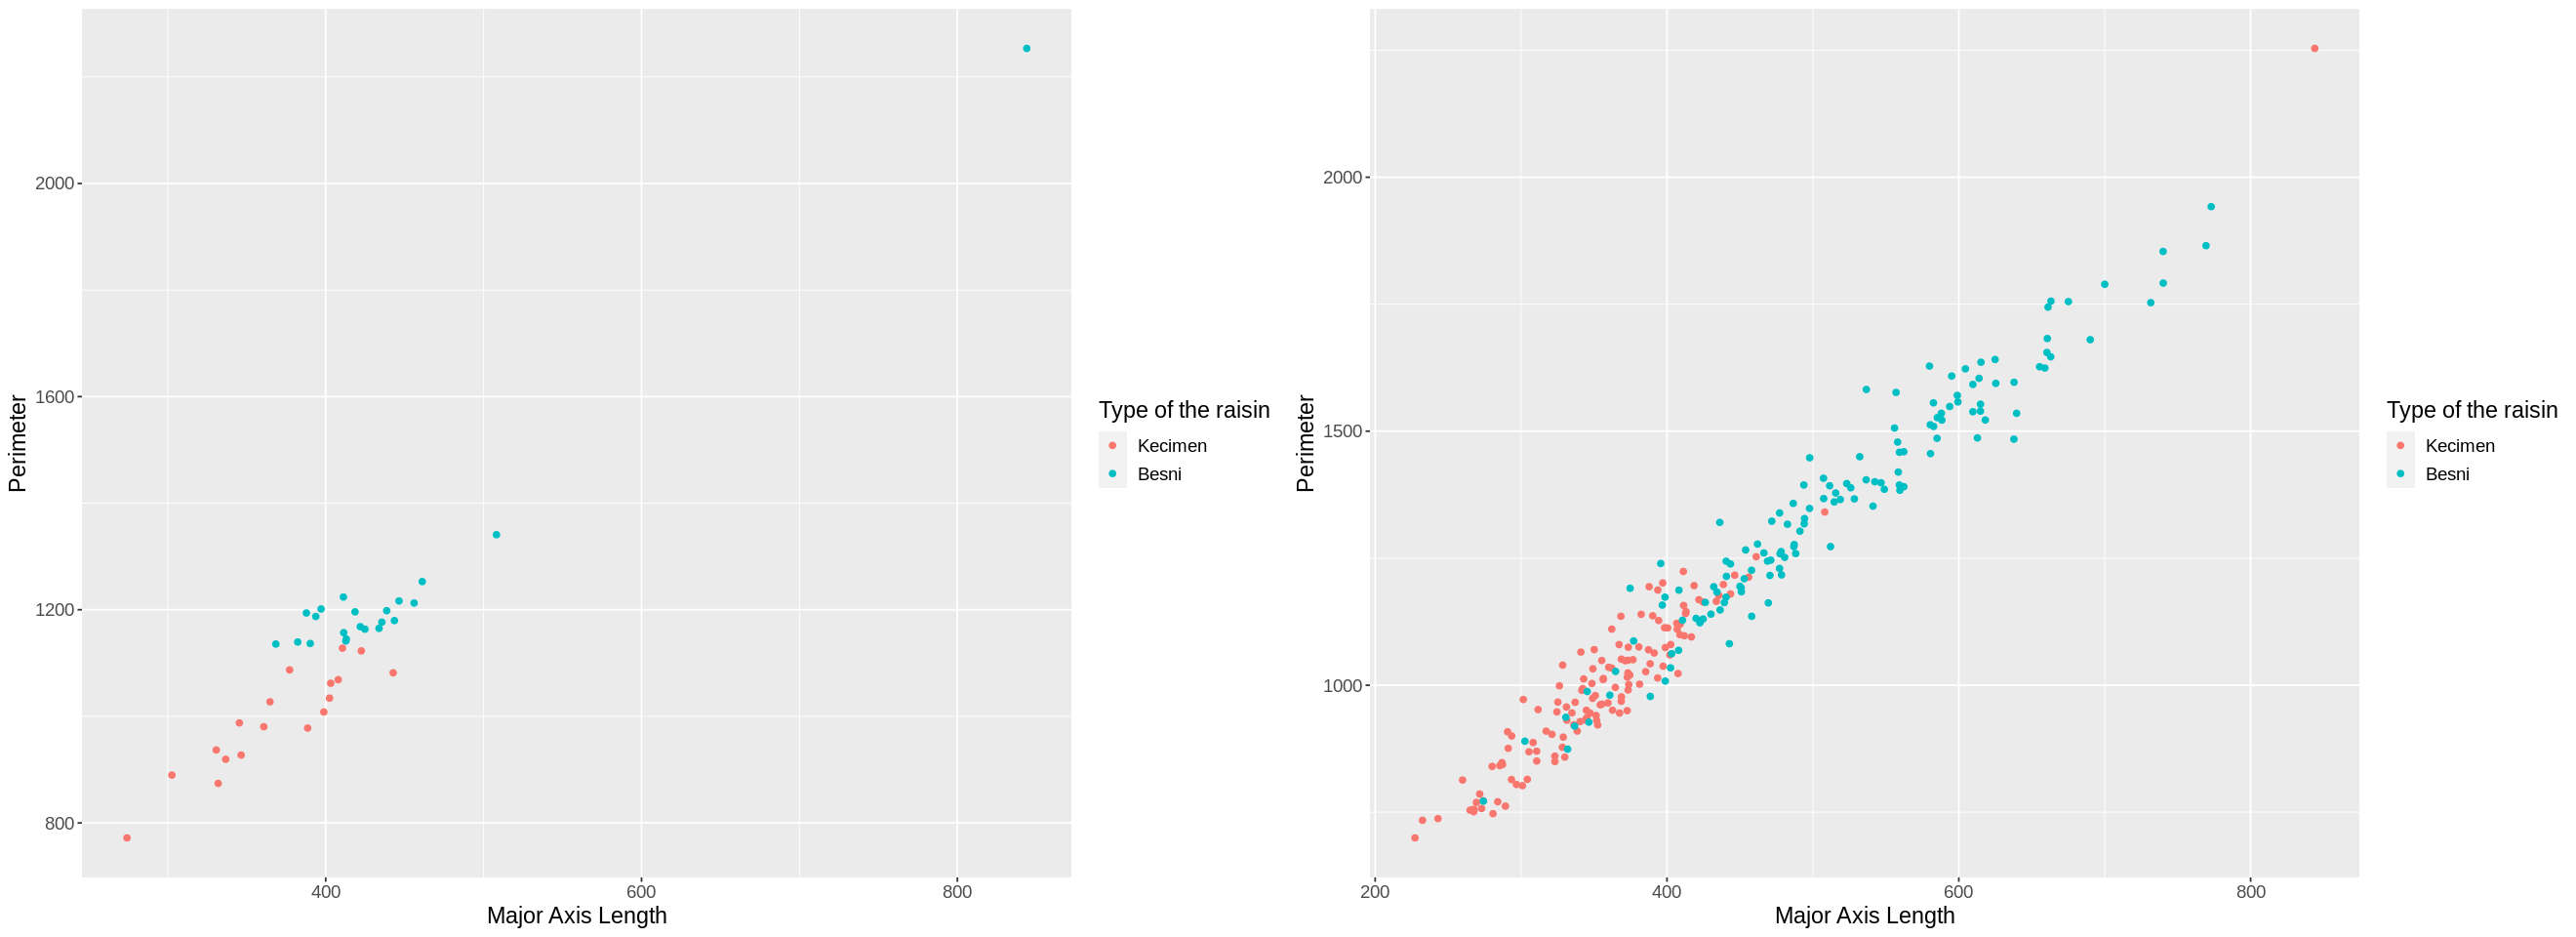

In [105]:
options(repr.plot.width = 22, repr.plot.height = 8)

wrong_prediction <- per_test_final |>
    filter(.pred_class != Class)

wrong_prediction_graph <- wrong_prediction |>
    ggplot(aes(x = MajorAxisLength, y = Perimeter, color = .pred_class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Perimeter", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

correct_type_raisin <- per_test_final |>
    ggplot(aes(x = MajorAxisLength, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Perimeter", color = "Type of the raisin") +
    theme(text = element_text(size = 14))

compare_wrong_vs_correct <- plot_grid(wrong_prediction_graph, correct_type_raisin, ncol = 2)
compare_wrong_vs_correct

The left graph shows the predicted classes which our knn classifier made wrong based on the combination of predictors perimeter and MajorAxisLength, whereas the right graph shows the actual class distribution.

It can be observed in the left graph that class of kecimen was predicted wrong compared to the actual right graph. This is because the k nearest neighbours near it was of the type kecinen where in actual it belonged to the class of Besni. 
Similarly besni was predicted wrong in the left graph as it had all the classes of besni near it but it belonged to the class of kecimen.
There is also a Kecimen outlier on the top right corner of the graph that is missclassified, because it lied in the far corner of the graph. This is because the closest labels to it were Besni.